### Step:-1
## Business case identification

## Domain Analysis

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [42]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [43]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [44]:
for i in df.columns:
    print(i+':::::::::::::',df[i].unique())

customerID::::::::::::: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender::::::::::::: ['Female' 'Male']
SeniorCitizen::::::::::::: [0 1]
Partner::::::::::::: ['Yes' 'No']
Dependents::::::::::::: ['No' 'Yes']
tenure::::::::::::: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService::::::::::::: ['No' 'Yes']
MultipleLines::::::::::::: ['No phone service' 'No' 'Yes']
InternetService::::::::::::: ['DSL' 'Fiber optic' 'No']
OnlineSecurity::::::::::::: ['No' 'Yes' 'No internet service']
OnlineBackup::::::::::::: ['Yes' 'No' 'No internet service']
DeviceProtection::::::::::::: ['No' 'Yes' 'No internet service']
TechSupport::::::::::::: ['No' 'Yes' 'No internet service']
StreamingTV::::::::::::: ['No' 'Yes' 'No internet service']
StreamingMovies::::::::::::: ['No' 'Yes' '

### Step:- 2
## Identification of dependent and independent variable

### Step:- 3
# EDA

In [45]:
df.shape

(7043, 21)

In [46]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [47]:
df.describe(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,1872-EBWSC,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [49]:
df.drop('customerID',axis = 1, inplace = True)

In [50]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [51]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [52]:
df.TotalCharges = pd.to_numeric(df.TotalCharges,errors='coerce')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [54]:
df[df.TotalCharges.isnull()].shape

(11, 20)

In [55]:
new_df=df[df.TotalCharges.isnull()==False]

In [56]:
new_df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [57]:
new_df[new_df['OnlineSecurity']=='No internet service'].shape

(1520, 20)

In [58]:
new_df.replace({'No internet service':'No', 'No phone service':'No'},inplace = True)

A:\anaconda\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [59]:
for i in new_df.columns:
    print(i+':::::::::::::',new_df[i].unique())

gender::::::::::::: ['Female' 'Male']
SeniorCitizen::::::::::::: [0 1]
Partner::::::::::::: ['Yes' 'No']
Dependents::::::::::::: ['No' 'Yes']
tenure::::::::::::: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService::::::::::::: ['No' 'Yes']
MultipleLines::::::::::::: ['No' 'Yes']
InternetService::::::::::::: ['DSL' 'Fiber optic' 'No']
OnlineSecurity::::::::::::: ['No' 'Yes']
OnlineBackup::::::::::::: ['Yes' 'No']
DeviceProtection::::::::::::: ['No' 'Yes']
TechSupport::::::::::::: ['No' 'Yes']
StreamingTV::::::::::::: ['No' 'Yes']
StreamingMovies::::::::::::: ['No' 'Yes']
Contract::::::::::::: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling::::::::::::: ['Yes' 'No']
PaymentMethod::::::::::::: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges::::

In [60]:
yes_no = ['Partner','Dependents','PhoneService','PaperlessBilling','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Churn']
for column in yes_no:
    new_df[column].replace({"Yes":1, "No":0},inplace = True)

A:\anaconda\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [61]:
new_df['gender'].replace({'Female':1, 'Male':0}, inplace = True)

In [62]:
for i in new_df.columns:
    print(i+':::::::::::::',new_df[i].unique())

gender::::::::::::: [1 0]
SeniorCitizen::::::::::::: [0 1]
Partner::::::::::::: [1 0]
Dependents::::::::::::: [0 1]
tenure::::::::::::: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService::::::::::::: [0 1]
MultipleLines::::::::::::: [0 1]
InternetService::::::::::::: ['DSL' 'Fiber optic' 'No']
OnlineSecurity::::::::::::: [0 1]
OnlineBackup::::::::::::: [1 0]
DeviceProtection::::::::::::: [0 1]
TechSupport::::::::::::: [0 1]
StreamingTV::::::::::::: [0 1]
StreamingMovies::::::::::::: [0 1]
Contract::::::::::::: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling::::::::::::: [1 0]
PaymentMethod::::::::::::: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges::::::::::::: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges::::::::::::: [  29.85 18

In [63]:
df1=pd.get_dummies(data=new_df,columns=['InternetService','Contract','PaymentMethod'])

In [64]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [65]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [66]:
df1.shape

(7032, 27)

In [67]:
for i in df1.columns:
    print(i+':::::::::::::',df1[i].unique())

gender::::::::::::: [1 0]
SeniorCitizen::::::::::::: [0 1]
Partner::::::::::::: [1 0]
Dependents::::::::::::: [0 1]
tenure::::::::::::: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService::::::::::::: [0 1]
MultipleLines::::::::::::: [0 1]
OnlineSecurity::::::::::::: [0 1]
OnlineBackup::::::::::::: [1 0]
DeviceProtection::::::::::::: [0 1]
TechSupport::::::::::::: [0 1]
StreamingTV::::::::::::: [0 1]
StreamingMovies::::::::::::: [0 1]
PaperlessBilling::::::::::::: [1 0]
MonthlyCharges::::::::::::: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges::::::::::::: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn::::::::::::: [0 1]
InternetService_DSL::::::::::::: [1 0]
InternetService_Fiber optic::::::::::::: [0 1]
InternetService_No::::::::::::: [0 1]
Contract_Month-to-month::::::::::::: [1 0]
Co

In [68]:
from sklearn.decomposition import PCA
pca=PCA()

In [69]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [71]:
columns_to_scale = ['tenure','MonthlyCharges','TotalCharges']
df1[columns_to_scale]=scaler.fit_transform(df1[columns_to_scale])

In [72]:
for i in df1.columns:
    print(i+':::::::::::::',df1[i].unique())

gender::::::::::::: [1 0]
SeniorCitizen::::::::::::: [0 1]
Partner::::::::::::: [1 0]
Dependents::::::::::::: [0 1]
tenure::::::::::::: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService::::::::::::: [0 1]
MultipleLines::::::::::::: [0

In [73]:
y=df1['Churn']
x=df1.drop('Churn',axis=1)

In [74]:
x.shape

(7032, 26)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [77]:
x_train.shape

(5625, 26)

In [82]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,),activation='relu'),
    keras.layers.Dense(15, input_shape=(20,),activation='relu'),
    keras.layers.Dense(10, input_shape=(15,),activation='relu'),
    keras.layers.Dense(5, input_shape=(10,),activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=500)

Epoch 1/500
176/176 [==============================] - 1s 1ms/step - loss: 0.5106 - accuracy: 0.7342
Epoch 2/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4439 - accuracy: 0.7604
Epoch 3/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.7943
Epoch 4/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.7954
Epoch 5/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8025
Epoch 6/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8000
Epoch 7/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4137 - accuracy: 0.8057
Epoch 8/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.8034
Epoch 9/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8082
Epoch 10/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4089 - accura

176/176 [==============================] - 0s 3ms/step - loss: 0.3550 - accuracy: 0.8315
Epoch 82/500
176/176 [==============================] - 0s 3ms/step - loss: 0.3523 - accuracy: 0.8329
Epoch 83/500
176/176 [==============================] - 0s 3ms/step - loss: 0.3488 - accuracy: 0.8338
Epoch 84/500
176/176 [==============================] - 0s 3ms/step - loss: 0.3503 - accuracy: 0.8306
Epoch 85/500
176/176 [==============================] - 0s 3ms/step - loss: 0.3508 - accuracy: 0.8306
Epoch 86/500
176/176 [==============================] - 0s 3ms/step - loss: 0.3505 - accuracy: 0.8315
Epoch 87/500
176/176 [==============================] - 0s 3ms/step - loss: 0.3483 - accuracy: 0.8341
Epoch 88/500
176/176 [==============================] - 0s 3ms/step - loss: 0.3484 - accuracy: 0.8316
Epoch 89/500
176/176 [==============================] - 0s 3ms/step - loss: 0.3468 - accuracy: 0.8363
Epoch 90/500
176/176 [==============================] - 0s 3ms/step - loss: 0.3481 - accuracy: 

176/176 [==============================] - 0s 3ms/step - loss: 0.3191 - accuracy: 0.8498
Epoch 161/500
176/176 [==============================] - 0s 3ms/step - loss: 0.3191 - accuracy: 0.8514
Epoch 162/500
176/176 [==============================] - 0s 3ms/step - loss: 0.3178 - accuracy: 0.8498
Epoch 163/500
176/176 [==============================] - 0s 3ms/step - loss: 0.3177 - accuracy: 0.8501
Epoch 164/500
176/176 [==============================] - 0s 3ms/step - loss: 0.3197 - accuracy: 0.8485
Epoch 165/500
176/176 [==============================] - 0s 3ms/step - loss: 0.3197 - accuracy: 0.8487
Epoch 166/500
176/176 [==============================] - 0s 3ms/step - loss: 0.3163 - accuracy: 0.8491
Epoch 167/500
176/176 [==============================] - 0s 3ms/step - loss: 0.3172 - accuracy: 0.8524
Epoch 168/500
176/176 [==============================] - 0s 3ms/step - loss: 0.3163 - accuracy: 0.8530
Epoch 169/500
176/176 [==============================] - 0s 3ms/step - loss: 0.3181 - a

176/176 [==============================] - 0s 3ms/step - loss: 0.2963 - accuracy: 0.8587
Epoch 240/500
176/176 [==============================] - 0s 3ms/step - loss: 0.3015 - accuracy: 0.8571
Epoch 241/500
176/176 [==============================] - 0s 3ms/step - loss: 0.3005 - accuracy: 0.8592
Epoch 242/500
176/176 [==============================] - 0s 3ms/step - loss: 0.2970 - accuracy: 0.8644
Epoch 243/500
176/176 [==============================] - 0s 3ms/step - loss: 0.3004 - accuracy: 0.8601
Epoch 244/500
176/176 [==============================] - 0s 3ms/step - loss: 0.3002 - accuracy: 0.8590
Epoch 245/500
176/176 [==============================] - 0s 3ms/step - loss: 0.2993 - accuracy: 0.8608
Epoch 246/500
176/176 [==============================] - 0s 3ms/step - loss: 0.2956 - accuracy: 0.8624
Epoch 247/500
176/176 [==============================] - 0s 3ms/step - loss: 0.2958 - accuracy: 0.8615
Epoch 248/500
176/176 [==============================] - 0s 3ms/step - loss: 0.2956 - a

176/176 [==============================] - 0s 3ms/step - loss: 0.2863 - accuracy: 0.8642
Epoch 319/500
176/176 [==============================] - 0s 3ms/step - loss: 0.2857 - accuracy: 0.8604
Epoch 320/500
176/176 [==============================] - 0s 3ms/step - loss: 0.2847 - accuracy: 0.8631
Epoch 321/500
176/176 [==============================] - 0s 3ms/step - loss: 0.2834 - accuracy: 0.8688
Epoch 322/500
176/176 [==============================] - 0s 3ms/step - loss: 0.2854 - accuracy: 0.8606
Epoch 323/500
176/176 [==============================] - 0s 3ms/step - loss: 0.2839 - accuracy: 0.8644
Epoch 324/500
176/176 [==============================] - 0s 3ms/step - loss: 0.2835 - accuracy: 0.8636
Epoch 325/500
176/176 [==============================] - 0s 3ms/step - loss: 0.2870 - accuracy: 0.8631
Epoch 326/500
176/176 [==============================] - 0s 3ms/step - loss: 0.2877 - accuracy: 0.8636
Epoch 327/500
176/176 [==============================] - 1s 3ms/step - loss: 0.2844 - a

176/176 [==============================] - 0s 3ms/step - loss: 0.2765 - accuracy: 0.8704
Epoch 398/500
176/176 [==============================] - 0s 3ms/step - loss: 0.2757 - accuracy: 0.8672
Epoch 399/500
176/176 [==============================] - 0s 3ms/step - loss: 0.2729 - accuracy: 0.8709
Epoch 400/500
176/176 [==============================] - 0s 3ms/step - loss: 0.2693 - accuracy: 0.8700
Epoch 401/500
176/176 [==============================] - 0s 3ms/step - loss: 0.2724 - accuracy: 0.8715
Epoch 402/500
176/176 [==============================] - 0s 3ms/step - loss: 0.2756 - accuracy: 0.8724
Epoch 403/500
176/176 [==============================] - 0s 3ms/step - loss: 0.2712 - accuracy: 0.8709
Epoch 404/500
176/176 [==============================] - 0s 3ms/step - loss: 0.2698 - accuracy: 0.8720
Epoch 405/500
176/176 [==============================] - 0s 3ms/step - loss: 0.2724 - accuracy: 0.8715
Epoch 406/500
176/176 [==============================] - 0s 3ms/step - loss: 0.2761 - a

176/176 [==============================] - 0s 3ms/step - loss: 0.2694 - accuracy: 0.8734
Epoch 477/500
176/176 [==============================] - 0s 3ms/step - loss: 0.2661 - accuracy: 0.8722
Epoch 478/500
176/176 [==============================] - 0s 3ms/step - loss: 0.2704 - accuracy: 0.8734
Epoch 479/500
176/176 [==============================] - 0s 3ms/step - loss: 0.2678 - accuracy: 0.8736
Epoch 480/500
176/176 [==============================] - 0s 3ms/step - loss: 0.2743 - accuracy: 0.8715
Epoch 481/500
176/176 [==============================] - 0s 3ms/step - loss: 0.2657 - accuracy: 0.8757
Epoch 482/500
176/176 [==============================] - 0s 3ms/step - loss: 0.2651 - accuracy: 0.8741
Epoch 483/500
176/176 [==============================] - 0s 3ms/step - loss: 0.2657 - accuracy: 0.8775
Epoch 484/500
176/176 [==============================] - 0s 3ms/step - loss: 0.2735 - accuracy: 0.8724
Epoch 485/500
176/176 [==============================] - 0s 3ms/step - loss: 0.2654 - a

In [83]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 1.3956 - accuracy: 0.7612


[1.3956221342086792, 0.7611940503120422]

In [84]:
y_pred=model.predict(x_test)

In [85]:
y_pred[:10]

array([[5.6361377e-01],
       [1.3087869e-02],
       [2.0344623e-06],
       [1.2204051e-03],
       [7.9599309e-01],
       [4.6079469e-15],
       [1.3888866e-38],
       [9.7448313e-01],
       [9.6990538e-01],
       [9.5707786e-01]], dtype=float32)

In [86]:
y_test[:10]

5283    0
5770    0
336     1
787     0
6151    1
5158    0
3556    0
2662    1
697     1
3727    1
Name: Churn, dtype: int64

In [89]:
y_predicted=[]
for i in y_pred:
    if i >0.5:
        y_predicted.append(1)
    else:
        y_predicted.append(0)

In [90]:
y_predicted[:10]

[1, 0, 0, 0, 1, 0, 0, 1, 1, 1]

In [92]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_predicted, y_test))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1063
           1       0.51      0.56      0.53       344

    accuracy                           0.76      1407
   macro avg       0.68      0.69      0.69      1407
weighted avg       0.77      0.76      0.76      1407



Text(69.0, 0.5, 'Truth')

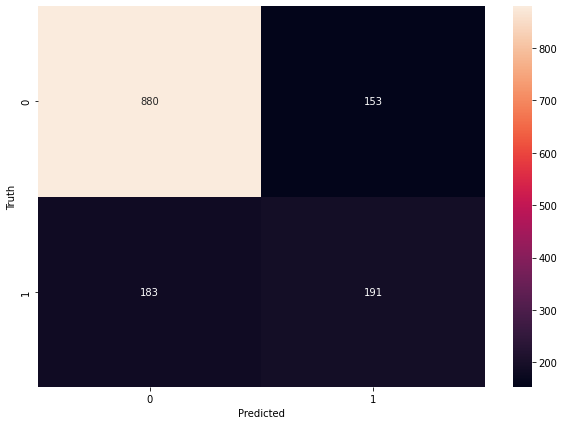

In [93]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
plt.figure(figsize =(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')